<a href="https://colab.research.google.com/github/creamcheesesteak/test_deeplearning/blob/master/NaverShopping_BiLSTM_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python -m pip install konlpy

     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 448 kB 42.3 MB/s 
     |████████████████████████████████| 86 kB 5.8 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [2]:
!curl -O https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5064  100  5064    0     0  92072      0 --:--:-- --:--:-- --:--:-- 93777


In [3]:
!bash ./mecab.sh

Installing automake (A dependency for mecab-ko)
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://security.ubuntu.com/ubuntu bionic-security/restricted amd64 P

In [4]:
!curl -O https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 19.6M  100 19.6M    0     0  91.4M      0 --:--:-- --:--:-- --:--:-- 91.4M


In [5]:
import pandas as pd
df = pd.read_table('./naver_shopping.txt', names=['ratings', 'reviews'])
df.head(5)

,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ


In [6]:
df.head(10)

,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
5,2,비추합니다 계란 뒤집을 때 완전 불편해요 ㅠㅠ 코팅도 묻어나고 보기엔 예쁘고 실용적...
6,1,주문을 11월6에 시켰는데 11월16일에 배송이 왔네요 ㅎㅎㅎ 여기 회사측과는 전화...
7,2,넉넉한 길이로 주문했는데도 안 맞네요 별로예요
8,2,보폴이 계속 때처럼 나오다가 지금은 안나네요~
9,2,110인데 전문속옷브랜드 위생팬티105보다 작은듯해요. 불편해요. 밴딩부분이 다 신...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   ratings  200000 non-null  int64 
 1   reviews  200000 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.1+ MB


In [8]:
df.drop_duplicates(subset=['reviews'], inplace=True)

In [9]:
len(df)

199908

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# x_data = df['reviews']
# y_data = df['ratings']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(df['reviews'], df['ratings'])
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((149931,), (149931,), (49977,), (49977,))

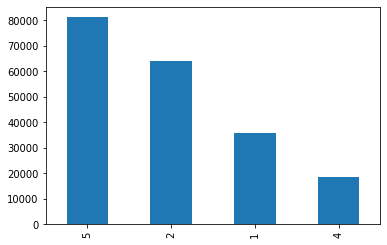

In [13]:
df['ratings'].value_counts().plot(kind='bar')

# NLP

In [14]:
x_train.str.replace('[^가-힣ㄱ-ㅎㅠ]', '')

169895                                    연결이되지않습니다구입을후회합니다
151497                       색깔도맘에들고충분히튼튼해서여러책이나앨범보관하기에도좋아요
35227                   재구매개주문했는데하나가불량인지방향제가안들어있네요확인잘부탁드릴게요
72708                                                매번좋습니다
190895                            고기많이붙어있어요바로양념에재웠어요맛있게먹을께요
                                ...                        
47871                               좀쓰다보니까뒤틀리고휘어서덜걱덜걱거리네요ㅠㅠ
50192                                     드디어물었던벌레정체가밝혀졌습니다
137883    보내지말라니깐보내시면어째요주문취소한다고전화드렸잖아요취소처리한다더니물건보내시면어째요반...
9613                                 가공부분이너무날까로워요자칫다칠수있을듯해요
184638                                        좋아요좋아여잘신고다닐게옹
Name: reviews, Length: 149931, dtype: object

In [15]:
from konlpy.tag import Mecab

In [16]:
mecab = Mecab()
print(mecab.morphs('선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다.'))

['선물', '용', '으로', '빨리', '받', '아서', '전달', '했어야', '하', '는', '상품', '이', '었', '는데', '머그', '컵', '만', '와서', '당황', '했', '습니다', '.']


In [17]:
x_train_small = x_train[0:5000]

In [18]:
sentence = list()
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

for tok in x_train_small:
  encoded = mecab.morphs(tok)
  sentence.append([ item for item in encoded if item not in stopwords ])

sentence

[['연결', '되', '않', '습니다', '.', '구입', '후회', '합니다'],
 ['색깔',
  '맘',
  '충분히',
  '튼튼',
  '해서',
  '여러',
  '책',
  '이나',
  '앨범',
  '보관',
  '기',
  '좋',
  '아요',
  '.'],
 ['재',
  '구매',
  '30',
  '개',
  '주문',
  '했',
  '는데',
  '하나',
  '불량',
  '인지',
  '방향제',
  '안',
  '어',
  '있',
  '네요',
  '.',
  '.',
  '확인',
  '잘',
  '부탁',
  '드릴게요',
  '.'],
 ['매번', '좋', '습니다', '!'],
 ['고기',
  '많이',
  '붙',
  '어',
  '있',
  '어요',
  '.',
  '바로',
  '양념',
  '재웠',
  '어요',
  '.',
  '맛있',
  '먹',
  '을께요',
  '.'],
 ['사용',
  '기',
  '좋',
  '습니다',
  '.',
  '당일',
  '배송',
  '라고',
  '해서',
  '신청',
  '했',
  '는데',
  '배송',
  '엉뚱',
  '데',
  '로',
  '서',
  '찾',
  '으로',
  '야',
  '불편',
  '함',
  '있',
  '었',
  '습니다',
  '.',
  '한번',
  '더',
  '관심',
  '부탁',
  '드립니다',
  '.'],
 ['ㅆ가이뻐용'],
 ['재',
  '구매',
  '여러',
  '번',
  '재',
  '구매',
  '중',
  '인데',
  '양',
  '너무',
  '표나',
  '줄',
  '었',
  '네요',
  '앞',
  '으로',
  '구매',
  '못',
  '할',
  '요'],
 ['배송', '너무', '느리', '지만', '물건', '마름', '어요'],
 ['넘',
  '허접',
  '네요',
  '휴지',
  '칸',
  '뽑',
  '때',
  '마다',
  '뚜껑',
 

# Tokenizer

In [19]:
import tensorflow as tf

In [20]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(sentence)

In [21]:
tokenizer.word_counts

OrderedDict([('연결', 26),
             ('되', 442),
             ('않', 409),
             ('습니다', 767),
             ('.', 3937),
             ('구입', 85),
             ('후회', 21),
             ('합니다', 504),
             ('색깔', 26),
             ('맘', 111),
             ('충분히', 3),
             ('튼튼', 82),
             ('해서', 355),
             ('여러', 46),
             ('책', 7),
             ('이나', 41),
             ('앨범', 4),
             ('보관', 19),
             ('기', 416),
             ('좋', 1670),
             ('아요', 988),
             ('재', 451),
             ('구매', 869),
             ('30', 9),
             ('개', 255),
             ('주문', 285),
             ('했', 788),
             ('는데', 1153),
             ('하나', 148),
             ('불량', 63),
             ('인지', 48),
             ('방향제', 2),
             ('안', 757),
             ('어', 522),
             ('있', 905),
             ('네요', 1711),
             ('확인', 47),
             ('잘', 906),
             ('부탁', 13),
             (

In [22]:
total_cnt = len(tokenizer.word_index)

rare_cnt = 0
total_freq, rare_freq = 0, 0
for key, value in tokenizer.word_counts.items():
  total_freq = total_freq + value # 전체단어수
  if (value <= 2):
    rare_cnt = rare_cnt + 1
    rare_freq = rare_freq + value # 2미만인 단어의 수


In [23]:
total_cnt, rare_cnt, (rare_cnt/total_cnt)*100, (rare_freq/total_freq)*100

(8174, 5401, 66.07536090041596, 7.791933305935538)

In [24]:
vocab_size = total_cnt - rare_cnt

In [25]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(vocab_size, oov_token='OOV')
tokenizer.fit_on_texts(sentence)

In [26]:
tokenizer.index_word

{1: 'OOV',
 2: '.',
 3: '네요',
 4: '좋',
 5: '어요',
 6: '는데',
 7: '아요',
 8: '잘',
 9: '있',
 10: '구매',
 11: '했',
 12: '습니다',
 13: '배송',
 14: '안',
 15: '너무',
 16: '같',
 17: '먹',
 18: '어',
 19: '거',
 20: '합니다',
 21: '~',
 22: '재',
 23: '되',
 24: '!',
 25: '쓰',
 26: '기',
 27: '않',
 28: '요',
 29: '것',
 30: '..',
 31: '없',
 32: '나',
 33: '사용',
 34: '로',
 35: '았',
 36: '아',
 37: '해서',
 38: '어서',
 39: '보',
 40: '주',
 41: '었',
 42: '해',
 43: '겠',
 44: '으로',
 45: '만',
 46: '제품',
 47: '보다',
 48: '서',
 49: '아서',
 50: '만족',
 51: '좀',
 52: '지만',
 53: '라',
 54: '입니다',
 55: ',',
 56: '면',
 57: '그냥',
 58: '주문',
 59: '가격',
 60: '생각',
 61: '니',
 62: '더',
 63: '개',
 64: '받',
 65: '해요',
 66: '맛',
 67: '할',
 68: '왔',
 69: '빠르',
 70: '많이',
 71: '샀',
 72: '사이즈',
 73: '사',
 74: '에서',
 75: '때',
 76: '시',
 77: '포장',
 78: '번',
 79: '맞',
 80: 'ㅠㅠ',
 81: '작',
 82: '맛있',
 83: '?',
 84: '별로',
 85: '던',
 86: '입',
 87: '음',
 88: '수',
 89: '두',
 90: '다른',
 91: '저렴',
 92: 'ㅠ',
 93: '세요',
 94: '^^',
 95: '하나',
 96: '아주',
 97:

In [27]:
x_train_small = tokenizer.texts_to_sequences(sentence)
x_train_small

[[441, 23, 27, 12, 2, 161, 531, 20],
 [442, 128, 2181, 171, 37, 278, 1238, 308, 1832, 575, 26, 4, 7, 2],
 [22,
  10,
  1018,
  63,
  58,
  11,
  6,
  95,
  210,
  265,
  1,
  14,
  18,
  9,
  3,
  2,
  2,
  273,
  8,
  758,
  1,
  2],
 [552, 4, 12, 24],
 [553, 70, 330, 18, 9, 5, 2, 211, 715, 1, 5, 2, 82, 17, 1117, 2],
 [33,
  26,
  4,
  12,
  2,
  1573,
  13,
  176,
  37,
  677,
  11,
  6,
  13,
  1,
  116,
  34,
  48,
  388,
  44,
  290,
  159,
  173,
  9,
  41,
  12,
  2,
  653,
  62,
  1,
  758,
  476,
  2],
 [1],
 [22,
  10,
  278,
  78,
  22,
  10,
  122,
  101,
  266,
  15,
  1,
  124,
  41,
  3,
  334,
  44,
  10,
  105,
  67,
  28],
 [13, 15, 494, 52, 215, 1, 5],
 [106,
  759,
  3,
  1019,
  1020,
  1118,
  75,
  309,
  342,
  83,
  1574,
  365,
  594,
  34,
  260,
  37,
  310,
  216,
  1019,
  137,
  75,
  309,
  654,
  18,
  219,
  443,
  1,
  2,
  2],
 [595, 760, 42, 335],
 [495, 655, 228, 102, 194, 46, 112, 40, 2182, 3, 153, 14, 256, 35, 6],
 [1573,
  13,
  444,
  1388,
  1

In [28]:
len(x_train_small[0]), len(x_train_small[40])

(8, 3)

In [29]:
hist_len = [ len(words) for words in x_train_small ]
hist_len

[8,
 14,
 22,
 4,
 16,
 32,
 1,
 20,
 7,
 29,
 4,
 15,
 43,
 40,
 12,
 26,
 19,
 29,
 19,
 21,
 19,
 11,
 13,
 15,
 18,
 26,
 24,
 8,
 25,
 6,
 5,
 43,
 22,
 23,
 17,
 33,
 12,
 24,
 10,
 9,
 3,
 6,
 14,
 16,
 30,
 9,
 4,
 29,
 5,
 30,
 21,
 10,
 5,
 10,
 43,
 7,
 18,
 8,
 12,
 3,
 7,
 6,
 19,
 8,
 11,
 8,
 26,
 6,
 38,
 9,
 10,
 17,
 15,
 17,
 11,
 7,
 51,
 9,
 16,
 24,
 29,
 9,
 8,
 9,
 18,
 16,
 24,
 7,
 7,
 23,
 39,
 5,
 53,
 6,
 20,
 24,
 13,
 15,
 5,
 16,
 16,
 40,
 7,
 40,
 13,
 9,
 46,
 54,
 4,
 10,
 8,
 3,
 20,
 29,
 32,
 6,
 10,
 7,
 11,
 5,
 4,
 19,
 17,
 7,
 6,
 4,
 9,
 4,
 16,
 17,
 34,
 15,
 23,
 12,
 21,
 46,
 9,
 17,
 13,
 21,
 20,
 6,
 12,
 9,
 8,
 21,
 16,
 26,
 27,
 11,
 9,
 19,
 6,
 11,
 6,
 49,
 16,
 4,
 40,
 7,
 14,
 7,
 14,
 35,
 39,
 2,
 13,
 2,
 25,
 15,
 3,
 13,
 7,
 9,
 32,
 8,
 24,
 16,
 15,
 5,
 44,
 10,
 35,
 16,
 23,
 6,
 52,
 5,
 30,
 9,
 10,
 7,
 18,
 31,
 5,
 36,
 9,
 37,
 9,
 39,
 32,
 8,
 7,
 11,
 7,
 25,
 12,
 8,
 6,
 20,
 2,
 8,
 18,
 5,
 24,
 17,


In [30]:
import matplotlib.pyplot as plt

(array([ 26.,  57., 420., 352., 360., 578., 259., 222., 349., 159., 144.,
        240.,  97., 107., 207.,  86.,  81., 163.,  81.,  83., 120.,  57.,
         47.,  98.,  52.,  43.,  94.,  31.,  40.,  60.,  27.,  29.,  43.,
         22.,  21.,  31.,  18.,  11.,  29.,  11.,  11.,  12.,   6.,   2.,
          6.,   2.,   2.,   2.,   0.,   2.]),
 array([ 1.  ,  2.34,  3.68,  5.02,  6.36,  7.7 ,  9.04, 10.38, 11.72,
        13.06, 14.4 , 15.74, 17.08, 18.42, 19.76, 21.1 , 22.44, 23.78,
        25.12, 26.46, 27.8 , 29.14, 30.48, 31.82, 33.16, 34.5 , 35.84,
        37.18, 38.52, 39.86, 41.2 , 42.54, 43.88, 45.22, 46.56, 47.9 ,
        49.24, 50.58, 51.92, 53.26, 54.6 , 55.94, 57.28, 58.62, 59.96,
        61.3 , 62.64, 63.98, 65.32, 66.66, 68.  ]),
 <a list of 50 Patch objects>)

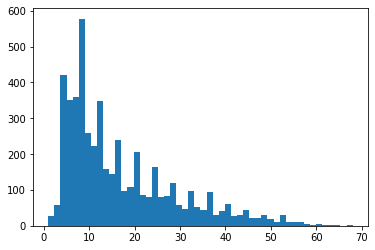

In [31]:
plt.hist(hist_len, bins=50)

In [32]:
sum(hist_len) / len(x_train_small)

17.033

In [33]:
x_train_small = tf.keras.preprocessing.sequence.pad_sequences(x_train_small, maxlen=50)

In [34]:
y_train_small = y_train[0:5000]

# make model

In [39]:
import numpy as np

In [40]:
y_train_small = np.array(y_train_small) - 1

In [42]:
np.unique(y_train_small)

array([0, 1, 3, 4])

In [36]:
model = tf.keras.models.Sequential()

In [43]:
model.add(tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=30, input_length=50)) # input layer
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128))) # hidden layer
# LSTM 대신 GRU 가 탁월하기 때문에 이를 이용할 것
model.add(tf.keras.layers.Dense(5, activation='softmax')) # output layer\

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [44]:
hist = model.fit(x_train_small, y_train_small, epochs=50, batch_size=256, validation_split=0.3, shuffle=True)

Epoch 1/50
14/14 [==============================] - 10s 380ms/step - loss: 1.5132 - acc: 0.3854 - val_loss: 1.3647 - val_acc: 0.4153
Epoch 2/50
14/14 [==============================] - 4s 266ms/step - loss: 1.3174 - acc: 0.4066 - val_loss: 1.2783 - val_acc: 0.4153
Epoch 3/50
14/14 [==============================] - 4s 269ms/step - loss: 1.2752 - acc: 0.4066 - val_loss: 1.2621 - val_acc: 0.4153
Epoch 4/50
14/14 [==============================] - 4s 266ms/step - loss: 1.2658 - acc: 0.4066 - val_loss: 1.2596 - val_acc: 0.4153
Epoch 5/50
14/14 [==============================] - 4s 263ms/step - loss: 1.2654 - acc: 0.4066 - val_loss: 1.2587 - val_acc: 0.4153
Epoch 6/50
14/14 [==============================] - 4s 269ms/step - loss: 1.2657 - acc: 0.4066 - val_loss: 1.2613 - val_acc: 0.4153
Epoch 7/50
14/14 [==============================] - 4s 263ms/step - loss: 1.2629 - acc: 0.4066 - val_loss: 1.2621 - val_acc: 0.4153
Epoch 8/50
14/14 [==============================] - 4s 268ms/step - loss: 1

In [45]:
model.evaluate(x_train_small, y_train_small)

157/157 [==============================] - 4s 24ms/step - loss: 1.2609 - acc: 0.4092


[1.2608964443206787, 0.4092000126838684]

In [ ]:
# LSTM(128), loss : 0.9170, acc : 0.8500
# GRU, loss : 0.9265, acc : 0.8436
# Bidirectional(LSTM(128)), loss : 0.8787, acc : 0.8382